## 3.1 Numpyと多次元配列

In [1]:
import numpy as np

In [2]:
x = np.array([1, 2, 3])

print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(3,)
1


In [3]:
W = np.array([[1, 2, 3], [4, 5, 6]])

print(W.shape)
print(W.ndim)

(2, 3)
2


In [4]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

print(W + X)
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


In [5]:
# ベクトルの内積
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)
print(y)

# 行列の積
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.dot(A, B)
print(C)

32
[[19 22]
 [43 50]]


In [8]:
print(a @ b)
print(A @ B)

32
[[19 22]
 [43 50]]


In [10]:
A

array([[1, 2],
       [3, 4]])

In [11]:
A.T

array([[1, 3],
       [2, 4]])

In [12]:
np.linalg.det(A) # 行列式

-2.0000000000000004

In [13]:
np.linalg.inv(A) # 逆行列

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [14]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov) # 行列式
    inv = np.linalg.inv(cov) # 逆行列
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp(-0.5*(x - mu).T @ inv @ (x - mu))
    return y

In [15]:
# x = (0, 0)における多変量正規分布の確率密度
x = np.array([[0], [0]]) # 2次元ベクトル(列ベクトル)
mu = np.array([[1], [2]]) # 平均
cov = np.array([[1, 0], [0, 1]]) # 共分散行列

y = multivariate_normal(x, mu, cov)
print(y)

[[0.01306423]]


## 3.3 2次元正規分布の可視化

In [16]:
import numpy as np
import matplotlib.pyplot as plt

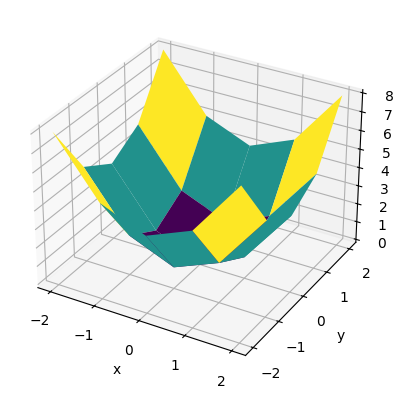

In [19]:
X = np.array([
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
    [-2, -1, 0, 1, 2],
])
Y = X.copy().T
z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

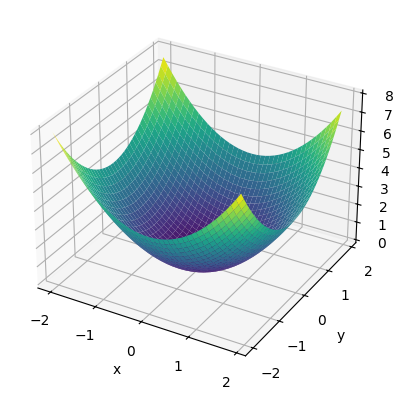

In [21]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(xs, ys)
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

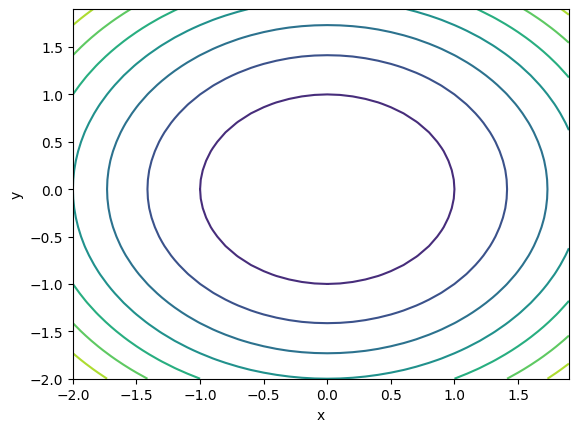

In [22]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

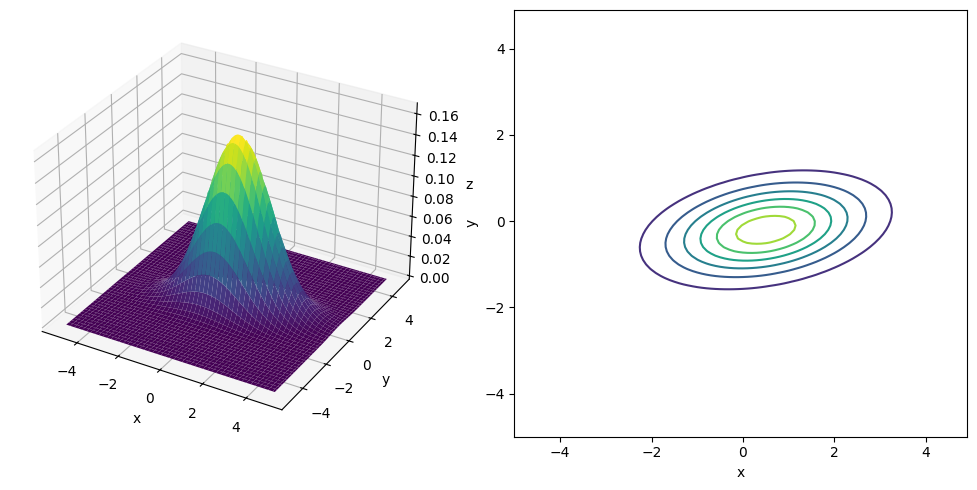

In [26]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov) # 行列式
    inv = np.linalg.inv(cov) # 逆行列
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp(-0.5*(x - mu).T @ inv @ (x - mu))
    return y

mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3], [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(len(xs)):
    for j in range(len(ys)):
        x = np.array([xs[i], ys[j]])
        Z[j, i] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(X, Y, Z)
ax2.set_xlabel('x')
ax2.set_ylabel('y')


plt.tight_layout()
plt.show()

## 3.4 多次元正規分布の最尤推定

In [31]:
import numpy as np
import os
np.random.seed(0)

In [30]:
N = 10000
D = 2

xs = np.random.randn(N, D) # サンプル数N, 特徴量数D
mu = np.sum(xs, axis=0) / N
cov = 0

for n in range(N):
    x = xs[n]
    z = x - mu
    z = z[:,np.newaxis] # D次元ベクトルを(D, 1)の行列に変換
    cov += z @ z.T # (D, 1) @ (1, D) = (D, D)

cov /= N

print(mu)
print(cov)

[-0.00489406 -0.0027747 ]
[[1.00869485 0.01978473]
 [0.01978473 1.00330215]]


In [33]:
data_name = 'height_weight'
path = os.path.join(data_name + '.txt')
xs = np.loadtxt(path)

print(xs.shape)

(25000, 2)


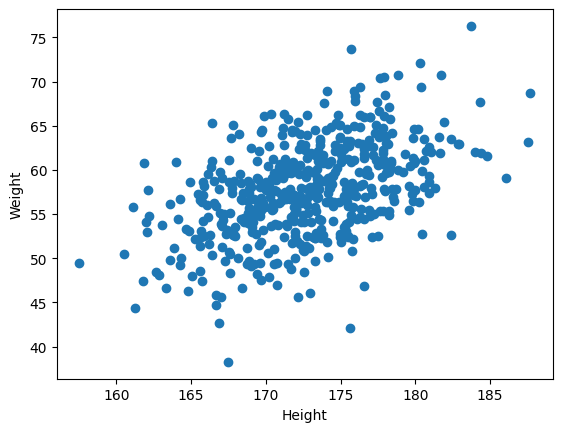

In [34]:
small_xs = xs[:500]
plt.scatter(small_xs[:,0], small_xs[:,1])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [35]:
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

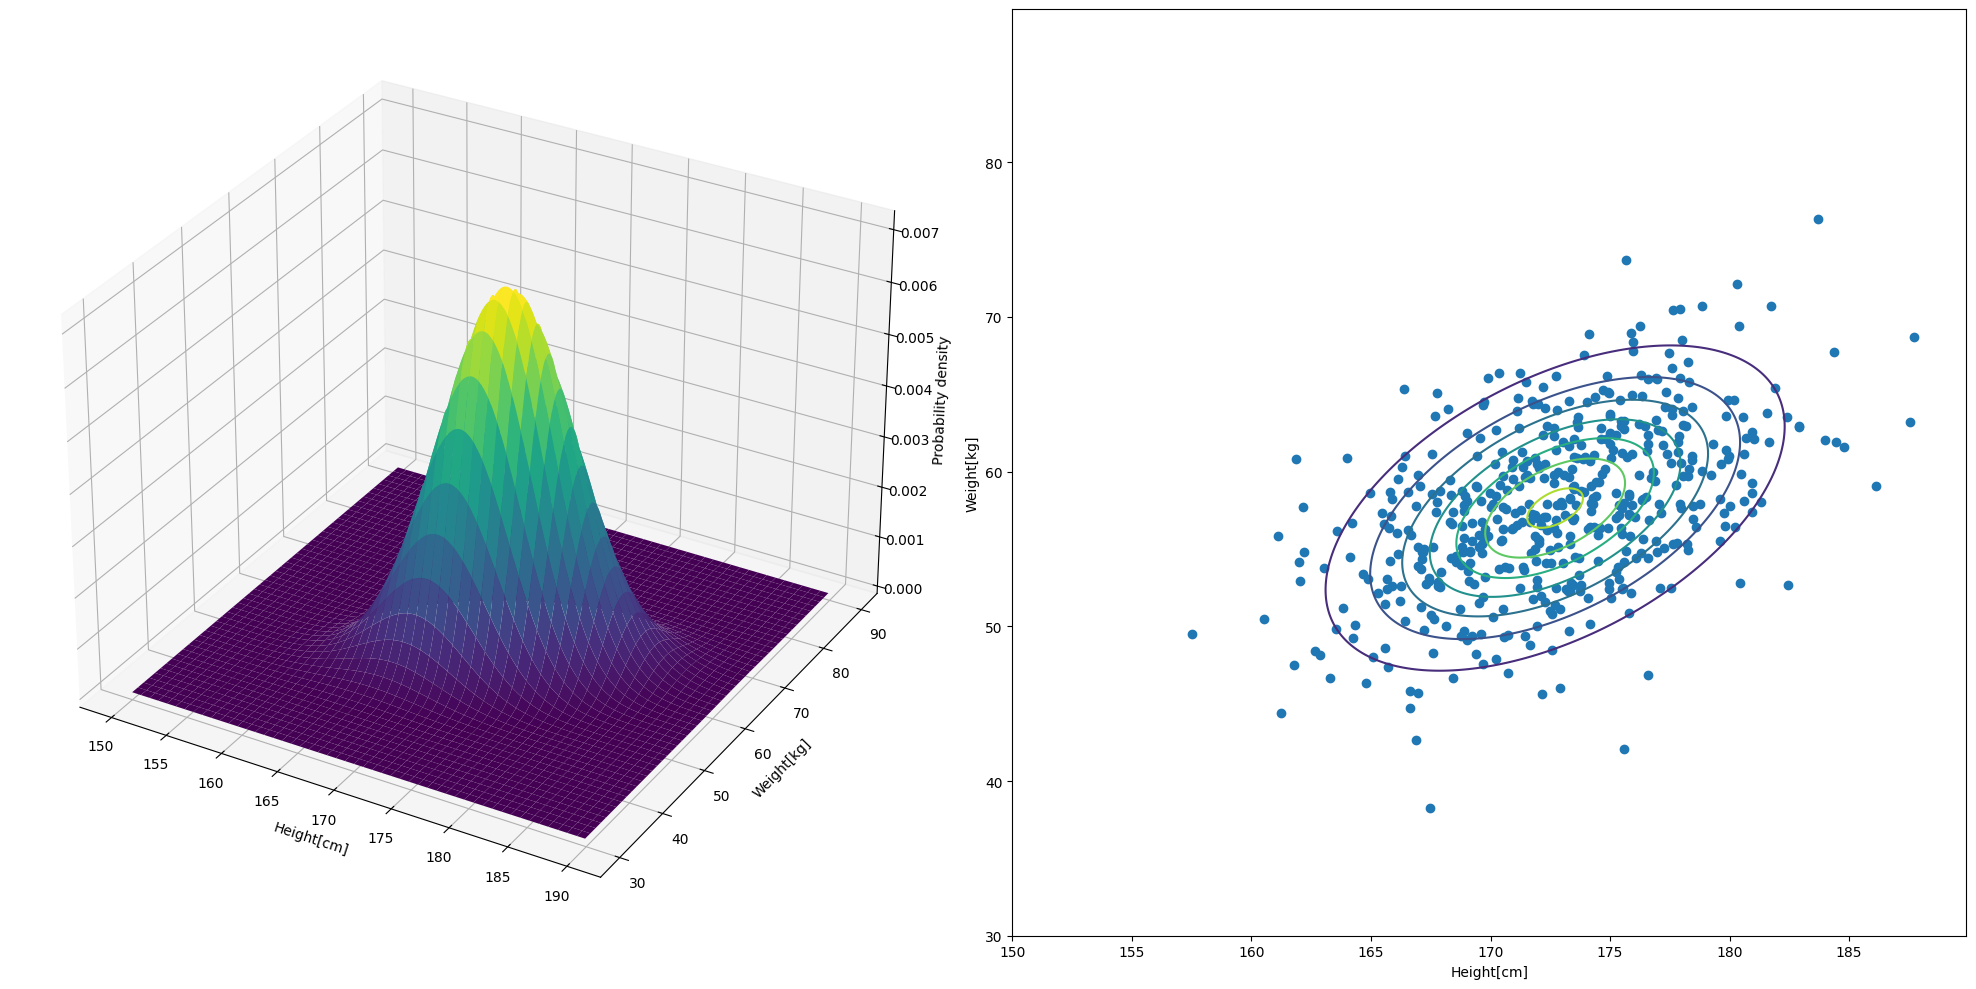

In [39]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov) # 行列式
    inv = np.linalg.inv(cov) # 逆行列
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp(-0.5*(x - mu).T @ inv @ (x - mu))
    return y


x = np.arange(150, 190, 0.1)
y = np.arange(30, 90, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        z = np.array([x[i], y[j]])
        Z[j, i] = multivariate_normal(z, mu, cov)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('Height[cm]')
ax1.set_ylabel('Weight[kg]')
ax1.set_zlabel('Probability density')

ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(X, Y, Z)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('Height[cm]')
ax2.set_ylabel('Weight[kg]')

plt.tight_layout()
plt.show()